## Week 8: Merging, Grouping, Plotting

### March 06, 2024

### Krishnapriya Vishnubhotla

### Recap

Last week, we learnt about the `pandas` library, and how to use it to:
- Load CSV files
    - DataFrame.shape
    - DataFrame.head(), DataFrame.tail()
- Clean the data
    - Rename columns (with DataFrame.rename)
    - Convert columns to the correct data types (DataFrame.convert_dtypes())
    - Replace missing values (with pd.NA)
    - Filter subsets (both columns and rows)
        - Boolean Filtering

- Transform the data
    - Operations on a single numerical column (multiply, round on a Series object)
    - Operations with multiple columns (add, multiply)
- Summarize the data
    - DataFrame.describe(), Series.describe()
    - Series.sum(), Series.mean()
    - Series.unique(), Series.nunique(), Series.value_counts()

### Read our data file

We will continue working with the `PanTHERIA` dataset from last lecture

In [1]:
# import the library
import pandas as pd

In [2]:
species_raw_data = pd.read_csv('PanTHERIA_WR05_Aug2008.csv')
display(species_raw_data)

,MSW05_Order,MSW05_Family,MSW05_Genus,MSW05_Species,MSW05_Binomial,1-1_ActivityCycle,5-1_AdultBodyMass_g,8-1_AdultForearmLen_mm,13-1_AdultHeadBodyLen_mm,2-1_AgeatEyeOpening_d,...,26-6_GR_MinLong_dd,26-7_GR_MidRangeLong_dd,27-1_HuPopDen_Min_n/km2,27-2_HuPopDen_Mean_n/km2,27-3_HuPopDen_5p_n/km2,27-4_HuPopDen_Change,28-1_Precip_Mean_mm,28-2_Temp_Mean_01degC,30-1_AET_Mean_mm,30-2_PET_Mean_mm
0,Artiodactyla,Camelidae,Camelus,dromedarius,Camelus dromedarius,3,492714.47,-999.0,-999.00,-999.00,...,-999.00,-999.00,-999,-999.00,-999.0,-999.00,-999.00,-999.00,-999.00,-999.00
1,Carnivora,Canidae,Canis,adustus,Canis adustus,1,10392.49,-999.0,745.32,-999.00,...,-17.53,13.00,0,35.20,1.0,0.14,90.75,236.51,922.90,1534.40
2,Carnivora,Canidae,Canis,aureus,Canis aureus,2,9658.70,-999.0,827.53,7.50,...,-17.05,45.74,0,79.29,0.0,0.10,44.61,217.23,438.02,1358.98
3,Carnivora,Canidae,Canis,latrans,Canis latrans,2,11989.10,-999.0,872.39,11.94,...,-168.12,-117.60,0,27.27,0.0,0.06,53.03,58.18,503.02,728.37
4,Carnivora,Canidae,Canis,lupus,Canis lupus,2,31756.51,-999.0,1055.00,14.01,...,-171.84,3.90,0,37.87,0.0,0.04,34.79,4.82,313.33,561.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,Rodentia,Muridae,Zyzomys,argurus,Zyzomys argurus,-999,40.42,-999.0,107.83,-999.00,...,114.33,131.09,0,1.10,0.0,0.02,62.33,256.75,692.93,1704.98
5412,Rodentia,Muridae,Zyzomys,maini,Zyzomys maini,-999,93.99,-999.0,-999.00,-999.00,...,131.45,132.66,0,0.17,0.0,0.00,90.76,265.30,877.90,1755.73
5413,Rodentia,Muridae,Zyzomys,palatilis,Zyzomys palatilis,-999,123.00,-999.0,-999.00,-999.00,...,136.72,137.08,0,0.00,0.0,-999.00,49.00,247.16,637.90,1638.67
5414,Rodentia,Muridae,Zyzomys,pedunculatus,Zyzomys pedunculatus,-999,100.00,-999.0,126.79,-999.00,...,130.16,132.97,0,0.09,0.0,0.25,21.64,215.72,291.82,1405.85


### Basic data cleaning
Let us replicate the data cleaning operations from last time:
- Filter to important columns
- Rename columns
- Convert data types
- Standardize missing values

In [3]:
# Extract columns
important_columns = [
    "MSW05_Order",
    "MSW05_Binomial",
    "5-1_AdultBodyMass_g",
    "23-1_SexualMaturityAge_d",
    "14-1_InterbirthInterval_d",
    "17-1_MaxLongevity_m",
    "15-1_LitterSize"
]

species_subset_data = species_raw_data[important_columns]

In [4]:
species_subset_data.head()

,MSW05_Order,MSW05_Binomial,5-1_AdultBodyMass_g,23-1_SexualMaturityAge_d,14-1_InterbirthInterval_d,17-1_MaxLongevity_m,15-1_LitterSize
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,614.41,480.0,0.98
1,Carnivora,Canis adustus,10392.49,249.88,-999.00,137.0,4.50
2,Carnivora,Canis aureus,9658.70,371.23,365.00,192.0,3.74
3,Carnivora,Canis latrans,11989.10,372.90,365.00,262.0,5.72
4,Carnivora,Canis lupus,31756.51,679.37,365.00,354.0,4.98


In [5]:
# Rename columns
old_to_new = {
    "MSW05_Order": "Order",
    "MSW05_Binomial": "Binomial",
    "5-1_AdultBodyMass_g": "Mass (g)",
    "23-1_SexualMaturityAge_d": "Maturity (days)",
    "14-1_InterbirthInterval_d": "Interbirth (days)",
    "17-1_MaxLongevity_m": "Longevity (months)",
    "15-1_LitterSize": "Litter Size"
}
species_renamed_data = species_subset_data.rename(columns=old_to_new)

In [6]:
species_renamed_data.head()

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,614.41,480.0,0.98
1,Carnivora,Canis adustus,10392.49,249.88,-999.00,137.0,4.50
2,Carnivora,Canis aureus,9658.70,371.23,365.00,192.0,3.74
3,Carnivora,Canis latrans,11989.10,372.90,365.00,262.0,5.72
4,Carnivora,Canis lupus,31756.51,679.37,365.00,354.0,4.98


In [7]:
# Convert column types
species_converted_data = species_renamed_data.convert_dtypes()
species_converted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order               5416 non-null   string 
 1   Binomial            5416 non-null   string 
 2   Mass (g)            5416 non-null   Float64
 3   Maturity (days)     5416 non-null   Float64
 4   Interbirth (days)   5416 non-null   Float64
 5   Longevity (months)  5416 non-null   Float64
 6   Litter Size         5416 non-null   Float64
dtypes: Float64(5), string(2)
memory usage: 322.8 KB


In [8]:
# Replace -999 values
species_data = species_converted_data.replace(-999, pd.NA)
species_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order               5416 non-null   string 
 1   Binomial            5416 non-null   string 
 2   Mass (g)            3542 non-null   Float64
 3   Maturity (days)     1051 non-null   Float64
 4   Interbirth (days)   695 non-null    Float64
 5   Longevity (months)  1013 non-null   Float64
 6   Litter Size         2501 non-null   Float64
dtypes: Float64(5), string(2)
memory usage: 322.8 KB


In [9]:
# a neat new function
species_data.sort_values(by='Longevity (months)')

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size
576,Dermoptera,Galeopterus variegates,1112.2,<NA>,<NA>,3.45,1.0
508,Rodentia,Eligmodontia typus,17.37,55.55,<NA>,9.6,6.24
2441,Rodentia,Microtus pennsylvanicus,42.53,31.74,21.19,11.0,5.16
1939,Didelphimorphia,Monodelphis dimidiata,44.56,<NA>,334.58,12.0,12.0
2753,Rodentia,Myopus schisticolor,29.99,25.37,25.0,12.0,5.25
...,...,...,...,...,...,...,...
5411,Rodentia,Zyzomys argurus,40.42,155.06,219.0,<NA>,2.76
5412,Rodentia,Zyzomys maini,93.99,<NA>,<NA>,<NA>,<NA>
5413,Rodentia,Zyzomys palatilis,123.0,<NA>,<NA>,<NA>,<NA>
5414,Rodentia,Zyzomys pedunculatus,100.0,<NA>,<NA>,<NA>,<NA>


In [10]:
species_data.sort_values(by='Longevity (months)', ascending=False)

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size
1689,Primates,Homo sapiens,58540.63,5582.93,958.12,1470.0,1.0
137,Cetacea,Balaenoptera physalus,47506008.23,2666.41,730.0,1392.0,1.01
136,Cetacea,Balaenoptera musculus,154321304.5,1959.8,821.25,1320.0,1.0
3207,Cetacea,Orcinus orca,5628758.66,4989.76,1825.0,1200.0,1.0
1951,Cetacea,Megaptera novaeangliae,30000000.01,1310.35,730.0,1140.0,1.0
...,...,...,...,...,...,...,...
5411,Rodentia,Zyzomys argurus,40.42,155.06,219.0,<NA>,2.76
5412,Rodentia,Zyzomys maini,93.99,<NA>,<NA>,<NA>,<NA>
5413,Rodentia,Zyzomys palatilis,123.0,<NA>,<NA>,<NA>,<NA>
5414,Rodentia,Zyzomys pedunculatus,100.0,<NA>,<NA>,<NA>,<NA>


In [11]:
# also applies to Series
species_data['Litter Size'].sort_values(ascending=False)

5152    16.89
1530     12.0
1939     12.0
1755     11.6
541      11.3
        ...  
5409     <NA>
5410     <NA>
5412     <NA>
5413     <NA>
5414     <NA>
Name: Litter Size, Length: 5416, dtype: Float64

In [12]:
species_data

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,614.41,480.0,0.98
1,Carnivora,Canis adustus,10392.49,249.88,<NA>,137.0,4.5
2,Carnivora,Canis aureus,9658.7,371.23,365.0,192.0,3.74
3,Carnivora,Canis latrans,11989.1,372.9,365.0,262.0,5.72
4,Carnivora,Canis lupus,31756.51,679.37,365.0,354.0,4.98
...,...,...,...,...,...,...,...
5411,Rodentia,Zyzomys argurus,40.42,155.06,219.0,<NA>,2.76
5412,Rodentia,Zyzomys maini,93.99,<NA>,<NA>,<NA>,<NA>
5413,Rodentia,Zyzomys palatilis,123.0,<NA>,<NA>,<NA>,<NA>
5414,Rodentia,Zyzomys pedunculatus,100.0,<NA>,<NA>,<NA>,<NA>


In [13]:
# how can we remove NA?
is_na = species_data['Litter Size'].isna() 
# NOTE:  species_data['Litter Size'] == pd.NA will not work (try it out!)
# NOTE:  species_data['Litter Size'] == <NA> will not work (try it out!)
is_na

0       False
1       False
2       False
3       False
4       False
        ...  
5411    False
5412     True
5413     True
5414     True
5415    False
Name: Litter Size, Length: 5416, dtype: bool

In [14]:
# boolean filtering
species_data[is_na]

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size
9,Primates,Callicebus discolor,<NA>,<NA>,<NA>,<NA>,<NA>
13,Primates,Callicebus lucifer,<NA>,<NA>,<NA>,<NA>,<NA>
14,Primates,Callicebus lugens,<NA>,<NA>,<NA>,<NA>,<NA>
15,Primates,Callicebus medemi,<NA>,<NA>,<NA>,<NA>,<NA>
16,Primates,Callicebus melanochir,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...
5409,Rodentia,Zygodontomys brunneus,75.59,<NA>,<NA>,<NA>,<NA>
5410,Rodentia,Zygogeomys trichopus,473.54,<NA>,<NA>,<NA>,<NA>
5412,Rodentia,Zyzomys maini,93.99,<NA>,<NA>,<NA>,<NA>
5413,Rodentia,Zyzomys palatilis,123.0,<NA>,<NA>,<NA>,<NA>


In [15]:
# we want the rows where Litter Size is NOT null
# flip the sign!
display(~is_na)

# NOTE:  species_data['Litter Size'] != pd.NA will not work (try it out!)
# NOTE:  species_data['Litter Size'] != <NA> will not work (try it out!)

0        True
1        True
2        True
3        True
4        True
        ...  
5411     True
5412    False
5413    False
5414    False
5415     True
Name: Litter Size, Length: 5416, dtype: bool

In [16]:
# boolean filtering!
species_data[~is_na].sort_values(by='Litter Size')
# species_data.dropna()

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size
2213,Proboscidea,Loxodonta africana,3824539.93,4977.64,1825.0,960.0,0.84
547,Diprotodontia,Lagostrophus fasciatus,1933.48,391.96,365.0,48.0,0.9
2296,Diprotodontia,Macropus parma,4156.62,600.21,213.0,120.0,0.9
5241,Cingulata,Tolypeutes tricinctus,1465.72,<NA>,<NA>,<NA>,0.93
2880,Afrosoricida,Neamblysomus julianae,21.99,<NA>,<NA>,<NA>,0.96
...,...,...,...,...,...,...,...
541,Rodentia,Heterocephalus glaber,39.36,<NA>,81.1,120.0,11.3
1755,Didelphimorphia,Marmosa mexicana,49.06,<NA>,<NA>,84.0,11.6
1939,Didelphimorphia,Monodelphis dimidiata,44.56,<NA>,334.58,12.0,12.0
1530,Didelphimorphia,Gracilinanus agilis,22.03,<NA>,<NA>,<NA>,12.0


In [17]:
species_data[~is_na]['Litter Size'].sort_values()
# notice how dataframe operations can be chained

2213     0.84
547       0.9
2296      0.9
5241     0.93
2880     0.96
        ...  
541      11.3
1755     11.6
1939     12.0
1530     12.0
5152    16.89
Name: Litter Size, Length: 2501, dtype: Float64

### Data Science Question of the Day

Are mammals that take longer go grow up (i.e, higher maturity age) at greater risk of extinction (IUCN status)?

We have maturity age information for mammals in the `species_data['Maturity (days)]` column.

Information about the Extinction level code is in a different data file! 

Let us read in `IUCN_status.csv` into a new DataFrame variable.

In [18]:
iucn_raw_data = pd.read_csv("iucn_status.csv")
iucn_data = iucn_raw_data.convert_dtypes()
iucn_data.head()

,order,species,iucn_status
0,Rodentia,Abditomys_latidens,DD
1,Rodentia,Abeomelomys_sevia,LC
2,Rodentia,Abrawayaomys_ruschii,LC
3,Rodentia,Abrocoma_bennettii,LC
4,Rodentia,Abrocoma_boliviensis,CR


### Merging Dataframes

We often will want to combine information from two (or more) data files to answer a data science question.

**Merging** is a `pandas` operation that *combines* the columns of two (or more) dataframes into a single mega-dataframe. 

How does `pandas` know which rows in each dataframe to merge together?
- We will tell `pandas` to merge two dataframes by **matching on a specific column** that is present in both datasets. This column can be thought of as a lookup key to merge the information from both dataframes

In [19]:
species_data.head()

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,614.41,480.0,0.98
1,Carnivora,Canis adustus,10392.49,249.88,<NA>,137.0,4.5
2,Carnivora,Canis aureus,9658.7,371.23,365.0,192.0,3.74
3,Carnivora,Canis latrans,11989.1,372.9,365.0,262.0,5.72
4,Carnivora,Canis lupus,31756.51,679.37,365.0,354.0,4.98


In [20]:
iucn_data.head()

,order,species,iucn_status
0,Rodentia,Abditomys_latidens,DD
1,Rodentia,Abeomelomys_sevia,LC
2,Rodentia,Abrawayaomys_ruschii,LC
3,Rodentia,Abrocoma_bennettii,LC
4,Rodentia,Abrocoma_boliviensis,CR


### Data Transformations on String Columns

We know we want to match the `iucn_data` and `species_data` dataframes on the column containing the name of the species.

BUT, the format of the species name in both these dataframes in slightly different....

- Camelus dromedarius (`species_data['Binomial`]) <==> Camelus_dromedarius (`iucn_data['species]`)


`pandas` looks for an exact match of the column values. 

Let us transform `iucn_data['species']` to have the same format as `species_data['Binomial']`.
- We want to *replace* the "_" in `iucn_data['species']` with a space.

In [21]:
# recall from pre-midterm python
iucn_species_str = "Camelus_dromedarius"
iucn_species_str.replace("_", " ")

'Camelus dromedarius'

We can apply the same operation to all the values in the column (Series) in a single step (no `for` loops!)
- recall we performed these transformations on numerical columns last lecture

In [22]:
# numerical
species_data['Maturity (days)']

0       1947.94
1        249.88
2        371.23
3         372.9
4        679.37
         ...   
5411     155.06
5412       <NA>
5413       <NA>
5414       <NA>
5415     155.06
Name: Maturity (days), Length: 5416, dtype: Float64

In [23]:
maturity_in_years = species_data['Maturity (days)'] / 365
display(maturity_in_years)

0       5.336822
1       0.684603
2       1.017068
3       1.021644
4       1.861288
          ...   
5411    0.424822
5412        <NA>
5413        <NA>
5414        <NA>
5415    0.424822
Name: Maturity (days), Length: 5416, dtype: Float64

With `string` columns, we need to use a slightly different format.

In [24]:
iucn_data['species']

0         Abditomys_latidens
1          Abeomelomys_sevia
2       Abrawayaomys_ruschii
3         Abrocoma_bennettii
4       Abrocoma_boliviensis
                ...         
5826         Zyzomys_argurus
5827           Zyzomys_maini
5828       Zyzomys_palatalis
5829    Zyzomys_pedunculatus
5830       Zyzomys_woodwardi
Name: species, Length: 5831, dtype: string

In [25]:
iucn_data['species'].str.upper()
# NOTE the additional ".str" before the transformation operation

0         ABDITOMYS_LATIDENS
1          ABEOMELOMYS_SEVIA
2       ABRAWAYAOMYS_RUSCHII
3         ABROCOMA_BENNETTII
4       ABROCOMA_BOLIVIENSIS
                ...         
5826         ZYZOMYS_ARGURUS
5827           ZYZOMYS_MAINI
5828       ZYZOMYS_PALATALIS
5829    ZYZOMYS_PEDUNCULATUS
5830       ZYZOMYS_WOODWARDI
Name: species, Length: 5831, dtype: string

In [26]:
# now let us try the replace operation
iucn_data['species'].str.replace("_", " ")

0         Abditomys latidens
1          Abeomelomys sevia
2       Abrawayaomys ruschii
3         Abrocoma bennettii
4       Abrocoma boliviensis
                ...         
5826         Zyzomys argurus
5827           Zyzomys maini
5828       Zyzomys palatalis
5829    Zyzomys pedunculatus
5830       Zyzomys woodwardi
Name: species, Length: 5831, dtype: string

In [27]:
# tada! add this as a new column
iucn_data['species_formatted'] = iucn_data['species'].str.replace("_", " ")

In [28]:
display(iucn_data)

,order,species,iucn_status,species_formatted
0,Rodentia,Abditomys_latidens,DD,Abditomys latidens
1,Rodentia,Abeomelomys_sevia,LC,Abeomelomys sevia
2,Rodentia,Abrawayaomys_ruschii,LC,Abrawayaomys ruschii
3,Rodentia,Abrocoma_bennettii,LC,Abrocoma bennettii
4,Rodentia,Abrocoma_boliviensis,CR,Abrocoma boliviensis
...,...,...,...,...
5826,Rodentia,Zyzomys_argurus,LC,Zyzomys argurus
5827,Rodentia,Zyzomys_maini,VU,Zyzomys maini
5828,Rodentia,Zyzomys_palatalis,CR,Zyzomys palatalis
5829,Rodentia,Zyzomys_pedunculatus,CR,Zyzomys pedunculatus


### The Merge Operation

We can now ask `pandas` to combine the two dataframes by matching on:
- the `Binomial` column in `species_data`
- and the `species_formatted` column in `iucn_data`

In [29]:
display(iucn_data['species_formatted'].head())
display(species_data['Binomial'].head())

0      Abditomys latidens
1       Abeomelomys sevia
2    Abrawayaomys ruschii
3      Abrocoma bennettii
4    Abrocoma boliviensis
Name: species_formatted, dtype: string

0    Camelus dromedarius
1          Canis adustus
2           Canis aureus
3          Canis latrans
4            Canis lupus
Name: Binomial, dtype: string

Formally, we merge two `DataFrames` using a `pandas` function called `merge`.
We'll use `merge` with four arguments:

- `left`: the first `DataFrame` to merge
- `right`: the second `DataFrame` to merge
- `left_on`: the name of the column in the `left` `DataFrame` to match with
- `right_on`: the name of the column in the `right` `DataFrame` to match with

In [30]:
combined_data = pd.merge(
    left=species_data,
    right=iucn_data,
    left_on="Binomial",
    right_on="species_formatted"
)

In [31]:
display(combined_data)

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size,order,species,iucn_status,species_formatted
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,614.41,480.0,0.98,Cetartiodactyla,Camelus_dromedarius,DD,Camelus dromedarius
1,Carnivora,Canis adustus,10392.49,249.88,<NA>,137.0,4.5,Carnivora,Canis_adustus,LC,Canis adustus
2,Carnivora,Canis aureus,9658.7,371.23,365.0,192.0,3.74,Carnivora,Canis_aureus,LC,Canis aureus
3,Carnivora,Canis latrans,11989.1,372.9,365.0,262.0,5.72,Carnivora,Canis_latrans,LC,Canis latrans
4,Carnivora,Canis lupus,31756.51,679.37,365.0,354.0,4.98,Carnivora,Canis_lupus,LC,Canis lupus
...,...,...,...,...,...,...,...,...,...,...,...
4941,Rodentia,Zygogeomys trichopus,473.54,<NA>,<NA>,<NA>,<NA>,Rodentia,Zygogeomys_trichopus,EN,Zygogeomys trichopus
4942,Rodentia,Zyzomys argurus,40.42,155.06,219.0,<NA>,2.76,Rodentia,Zyzomys_argurus,LC,Zyzomys argurus
4943,Rodentia,Zyzomys maini,93.99,<NA>,<NA>,<NA>,<NA>,Rodentia,Zyzomys_maini,VU,Zyzomys maini
4944,Rodentia,Zyzomys pedunculatus,100.0,<NA>,<NA>,<NA>,<NA>,Rodentia,Zyzomys_pedunculatus,CR,Zyzomys pedunculatus


In [32]:
print(len(species_data.columns), len(iucn_data.columns), len(combined_data.columns))
print(len(species_data), len(iucn_data), len(combined_data))
# only the species present in both dataframes are in the combined dataframe

7 4 11
5416 5831 4946


### Further cleaning

We have information about `order` in both dataframes: `species_data['Order']` and `iucn_data['order']`.

Do they always match?

In [33]:
combined_data.head()

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size,order,species,iucn_status,species_formatted
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,614.41,480.0,0.98,Cetartiodactyla,Camelus_dromedarius,DD,Camelus dromedarius
1,Carnivora,Canis adustus,10392.49,249.88,<NA>,137.0,4.5,Carnivora,Canis_adustus,LC,Canis adustus
2,Carnivora,Canis aureus,9658.7,371.23,365.0,192.0,3.74,Carnivora,Canis_aureus,LC,Canis aureus
3,Carnivora,Canis latrans,11989.1,372.9,365.0,262.0,5.72,Carnivora,Canis_latrans,LC,Canis latrans
4,Carnivora,Canis lupus,31756.51,679.37,365.0,354.0,4.98,Carnivora,Canis_lupus,LC,Canis lupus


In [34]:
# let us check if they match
is_order_match = combined_data['Order'] == combined_data['order']

In [35]:
is_order_match

0       False
1        True
2        True
3        True
4        True
        ...  
4941     True
4942     True
4943     True
4944     True
4945     True
Length: 4946, dtype: boolean

In [36]:
is_order_match.value_counts()

True     4208
False     738
dtype: Int64

In [37]:
# let us filter out these rows!
# remember: Boolean filtering
combined_data[is_order_match]

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size,order,species,iucn_status,species_formatted
1,Carnivora,Canis adustus,10392.49,249.88,<NA>,137.0,4.5,Carnivora,Canis_adustus,LC,Canis adustus
2,Carnivora,Canis aureus,9658.7,371.23,365.0,192.0,3.74,Carnivora,Canis_aureus,LC,Canis aureus
3,Carnivora,Canis latrans,11989.1,372.9,365.0,262.0,5.72,Carnivora,Canis_latrans,LC,Canis latrans
4,Carnivora,Canis lupus,31756.51,679.37,365.0,354.0,4.98,Carnivora,Canis_lupus,LC,Canis lupus
6,Primates,Callicebus cupreus,1117.02,<NA>,395.41,<NA>,1.01,Primates,Callicebus_cupreus,LC,Callicebus cupreus
...,...,...,...,...,...,...,...,...,...,...,...
4941,Rodentia,Zygogeomys trichopus,473.54,<NA>,<NA>,<NA>,<NA>,Rodentia,Zygogeomys_trichopus,EN,Zygogeomys trichopus
4942,Rodentia,Zyzomys argurus,40.42,155.06,219.0,<NA>,2.76,Rodentia,Zyzomys_argurus,LC,Zyzomys argurus
4943,Rodentia,Zyzomys maini,93.99,<NA>,<NA>,<NA>,<NA>,Rodentia,Zyzomys_maini,VU,Zyzomys maini
4944,Rodentia,Zyzomys pedunculatus,100.0,<NA>,<NA>,<NA>,<NA>,Rodentia,Zyzomys_pedunculatus,CR,Zyzomys pedunculatus


In [38]:
# check: where do they NOT match?
combined_data[~is_order_match]

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size,order,species,iucn_status,species_formatted
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,614.41,480.0,0.98,Cetartiodactyla,Camelus_dromedarius,DD,Camelus dromedarius
5,Artiodactyla,Bos javanicus,635974.34,797.31,<NA>,318.96,1.22,Cetartiodactyla,Bos_javanicus,EN,Bos javanicus
21,Artiodactyla,Bos sauveli,791321.76,755.15,<NA>,<NA>,<NA>,Cetartiodactyla,Bos_sauveli,CR,Bos sauveli
22,Artiodactyla,Boselaphus tragocamelus,182253.04,<NA>,400.5,260.4,1.39,Cetartiodactyla,Boselaphus_tragocamelus,LC,Boselaphus tragocamelus
28,Cetacea,Caperea marginata,31999999.98,<NA>,<NA>,<NA>,0.98,Cetartiodactyla,Caperea_marginata,DD,Caperea marginata
...,...,...,...,...,...,...,...,...,...,...,...
4863,Soricomorpha,Uropsilus investigator,<NA>,<NA>,<NA>,<NA>,<NA>,Eulipotyphla,Uropsilus_investigator,DD,Uropsilus investigator
4864,Soricomorpha,Uropsilus soricipes,16.0,<NA>,<NA>,<NA>,<NA>,Eulipotyphla,Uropsilus_soricipes,LC,Uropsilus soricipes
4865,Soricomorpha,Urotrichus talpoides,18.2,371.23,<NA>,42.0,3.49,Eulipotyphla,Urotrichus_talpoides,LC,Urotrichus talpoides
4892,Artiodactyla,Vicugna vicugna,47499.61,941.19,547.5,297.6,1.0,Cetartiodactyla,Vicugna_vicugna,LC,Vicugna vicugna


In [39]:
# Alternate method
is_order_mismatch = combined_data['Order'] != combined_data['order']
combined_data[is_order_mismatch]

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size,order,species,iucn_status,species_formatted
0,Artiodactyla,Camelus dromedarius,492714.47,1947.94,614.41,480.0,0.98,Cetartiodactyla,Camelus_dromedarius,DD,Camelus dromedarius
5,Artiodactyla,Bos javanicus,635974.34,797.31,<NA>,318.96,1.22,Cetartiodactyla,Bos_javanicus,EN,Bos javanicus
21,Artiodactyla,Bos sauveli,791321.76,755.15,<NA>,<NA>,<NA>,Cetartiodactyla,Bos_sauveli,CR,Bos sauveli
22,Artiodactyla,Boselaphus tragocamelus,182253.04,<NA>,400.5,260.4,1.39,Cetartiodactyla,Boselaphus_tragocamelus,LC,Boselaphus tragocamelus
28,Cetacea,Caperea marginata,31999999.98,<NA>,<NA>,<NA>,0.98,Cetartiodactyla,Caperea_marginata,DD,Caperea marginata
...,...,...,...,...,...,...,...,...,...,...,...
4863,Soricomorpha,Uropsilus investigator,<NA>,<NA>,<NA>,<NA>,<NA>,Eulipotyphla,Uropsilus_investigator,DD,Uropsilus investigator
4864,Soricomorpha,Uropsilus soricipes,16.0,<NA>,<NA>,<NA>,<NA>,Eulipotyphla,Uropsilus_soricipes,LC,Uropsilus soricipes
4865,Soricomorpha,Urotrichus talpoides,18.2,371.23,<NA>,42.0,3.49,Eulipotyphla,Urotrichus_talpoides,LC,Urotrichus talpoides
4892,Artiodactyla,Vicugna vicugna,47499.61,941.19,547.5,297.6,1.0,Cetartiodactyla,Vicugna_vicugna,LC,Vicugna vicugna


In [40]:
combined_data_clean = combined_data[is_order_match]

In [41]:
display(combined_data_clean)
# optional: remove unnecessary columns
# keep_columns = [...]
# combined_data_clean = combined_data_clean[keep_columns]

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size,order,species,iucn_status,species_formatted
1,Carnivora,Canis adustus,10392.49,249.88,<NA>,137.0,4.5,Carnivora,Canis_adustus,LC,Canis adustus
2,Carnivora,Canis aureus,9658.7,371.23,365.0,192.0,3.74,Carnivora,Canis_aureus,LC,Canis aureus
3,Carnivora,Canis latrans,11989.1,372.9,365.0,262.0,5.72,Carnivora,Canis_latrans,LC,Canis latrans
4,Carnivora,Canis lupus,31756.51,679.37,365.0,354.0,4.98,Carnivora,Canis_lupus,LC,Canis lupus
6,Primates,Callicebus cupreus,1117.02,<NA>,395.41,<NA>,1.01,Primates,Callicebus_cupreus,LC,Callicebus cupreus
...,...,...,...,...,...,...,...,...,...,...,...
4941,Rodentia,Zygogeomys trichopus,473.54,<NA>,<NA>,<NA>,<NA>,Rodentia,Zygogeomys_trichopus,EN,Zygogeomys trichopus
4942,Rodentia,Zyzomys argurus,40.42,155.06,219.0,<NA>,2.76,Rodentia,Zyzomys_argurus,LC,Zyzomys argurus
4943,Rodentia,Zyzomys maini,93.99,<NA>,<NA>,<NA>,<NA>,Rodentia,Zyzomys_maini,VU,Zyzomys maini
4944,Rodentia,Zyzomys pedunculatus,100.0,<NA>,<NA>,<NA>,<NA>,Rodentia,Zyzomys_pedunculatus,CR,Zyzomys pedunculatus


### Recall our data science question

What is the relationship between maturity and extinction status?

Let us find out the **average maturity age for each extinction level** in the IUCN levels.

In [42]:
combined_data_clean['iucn_status'].value_counts()

LC    2509
DD     504
VU     392
EN     331
NT     276
CR     142
EX      54
Name: iucn_status, dtype: Int64

In [43]:
combined_data_clean['Maturity (days)'].describe()

count         797.0
mean     573.053902
std      694.912852
min           13.57
25%           126.3
50%          350.76
75%          739.52
max         5582.93
Name: Maturity (days), dtype: Float64

### Grouping

`pandas` has a `DataFrame.groupby()` function that allows us to compute aggregate measures for *grouped* subsets of the data in one (or two) line(s) of code.

The data can be *grouped* based on the values in a column. The *measures* can be any statistic about the other columns of the data:
- For each `order` (*group*), how many *unique* `species` exist?
- For each `order` (*group*), what is the *average* `Mass`?

Our question:
- For each `iucn_status` (*group*), what is the *average* `Maturity (days)`?

In [44]:
# The long road #1
iucn_levels = list(combined_data_clean['iucn_status'].unique())
print(iucn_levels)

['LC', 'VU', 'EN', 'DD', 'CR', 'NT', 'EX']


In [45]:
# The long road #1

is_lc = combined_data_clean['iucn_status']=='LC' # boolean filter
lc_species = combined_data_clean[is_lc] # extract subset of the dataframe
lc_avg = lc_species['Maturity (days)'].mean() #compute mean of the maturity column values
print(lc_avg)

is_vu = combined_data_clean['iucn_status']=='VU'
vu_species = combined_data_clean[is_vu]
vu_avg = vu_species['Maturity (days)'].mean()
print(vu_avg)


# .... and so on for each IUCN level .....
# NOT efficient! Not enough automation!

421.85624999999993
959.0201408450705


In [46]:
# The long read #2
avg_values = {}
for level in iucn_levels:
    is_level = combined_data_clean['iucn_status'] == level
    level_species = combined_data_clean[is_level]
    level_avg = level_species['Maturity (days)'].mean()
    avg_values[level] = level_avg

print(avg_values)

## better....but there is something even more better!

{'LC': 421.85624999999993, 'VU': 959.0201408450705, 'EN': 1229.000476190476, 'DD': 250.77, 'CR': 1300.1192000000003, 'NT': 626.7277999999999, 'EX': <NA>}


In [47]:
# groupby and average

grouped_data = combined_data_clean.groupby('iucn_status')
group_avg = grouped_data['Maturity (days)'].mean()

In [48]:
group_avg
# what is the type?

iucn_status
CR      1300.1192
DD         250.77
EN    1229.000476
EX           <NA>
LC      421.85625
NT       626.7278
VU     959.020141
Name: Maturity (days), dtype: Float64

In [49]:
group_avg['DD']

250.77

In [50]:
# sort!
group_avg.round(3).sort_values()

# to answer the question, we need to *interpret* these values: do the more endangered species have 
# higher or lower average maturity?
# A job for you! (humans)

iucn_status
DD      250.77
LC     421.856
NT     626.728
VU      959.02
EN      1229.0
CR    1300.119
EX        <NA>
Name: Maturity (days), dtype: Float64

In [51]:
# can be chained
combined_data_clean.groupby('iucn_status')['Maturity (days)'].mean()

iucn_status
CR      1300.1192
DD         250.77
EN    1229.000476
EX           <NA>
LC      421.85625
NT       626.7278
VU     959.020141
Name: Maturity (days), dtype: Float64

### What are the data subsets for each group?

Recall the two steps we performed for groupby-aggregate:
1. `grouped_df = DataFrame.groupby(column1)`
2. `grouped_df[column2].agg_measure()`

Let us examine the output of step 1 in a bit more detail

In [52]:
grouped_data = combined_data_clean.groupby('iucn_status')

In [53]:
display(grouped_data)

This is an internal `pandas` representation that is not very accessible to us.

We can think of it as a dictionary that maps each group to the subset of the dataframe belonging to that group.

We can obtain the data subset for a particular group using the `DataFrameGroupBy.get_group()` method.

In [54]:
grouped_data.get_group('CR')
# what is the type?

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size,order,species,iucn_status,species_formatted
37,Primates,Ateles fusciceps,9067.94,1799.68,851.66,288.0,1.01,Primates,Ateles_fusciceps,CR,Ateles fusciceps
39,Primates,Ateles hybridus,<NA>,<NA>,<NA>,<NA>,<NA>,Primates,Ateles_hybridus,CR,Ateles hybridus
44,Primates,Callicebus oenanthe,992.4,<NA>,<NA>,<NA>,1.02,Primates,Callicebus_oenanthe,CR,Callicebus oenanthe
151,Primates,Cercopithecus dryas,2784.06,<NA>,<NA>,<NA>,1.02,Primates,Cercopithecus_dryas,CR,Cercopithecus dryas
344,Rodentia,Biswamoyopterus biswasi,<NA>,<NA>,<NA>,<NA>,<NA>,Rodentia,Biswamoyopterus_biswasi,CR,Biswamoyopterus biswasi
...,...,...,...,...,...,...,...,...,...,...,...
4878,Primates,Varecia rubra,3872.6,<NA>,<NA>,<NA>,<NA>,Primates,Varecia_rubra,CR,Varecia rubra
4879,Primates,Varecia variegata,3849.99,701.52,365.0,384.0,2.16,Primates,Varecia_variegata,CR,Varecia variegata
4893,Carnivora,Viverra civettina,12061.27,<NA>,<NA>,<NA>,<NA>,Carnivora,Viverra_civettina,CR,Viverra civettina
4927,Monotremata,Zaglossus attenboroughi,<NA>,<NA>,<NA>,<NA>,<NA>,Monotremata,Zaglossus_attenboroughi,CR,Zaglossus attenboroughi


### One more example

Say we want to find out the *number of unique species* (measure) within each *order* (group) in our dataframe.

- we want to `groupby('order')`
- and for each group, find the `['Binomial'].nunique`

In [55]:
combined_data_clean.head()

,Order,Binomial,Mass (g),Maturity (days),Interbirth (days),Longevity (months),Litter Size,order,species,iucn_status,species_formatted
1,Carnivora,Canis adustus,10392.49,249.88,<NA>,137.0,4.5,Carnivora,Canis_adustus,LC,Canis adustus
2,Carnivora,Canis aureus,9658.7,371.23,365.0,192.0,3.74,Carnivora,Canis_aureus,LC,Canis aureus
3,Carnivora,Canis latrans,11989.1,372.9,365.0,262.0,5.72,Carnivora,Canis_latrans,LC,Canis latrans
4,Carnivora,Canis lupus,31756.51,679.37,365.0,354.0,4.98,Carnivora,Canis_lupus,LC,Canis lupus
6,Primates,Callicebus cupreus,1117.02,<NA>,395.41,<NA>,1.01,Primates,Callicebus_cupreus,LC,Callicebus cupreus


In [56]:
# how many unique orders are there?
combined_data_clean['order'].nunique()

25

In [57]:
# method 1: because each species is in a new row, we can simply use value_counts
combined_data_clean['order'].value_counts()

Rodentia            2039
Chiroptera          1048
Primates             321
Carnivora            262
Diprotodontia        140
Lagomorpha            85
Didelphimorphia       71
Dasyuromorphia        63
Afrosoricida          50
Peramelemorphia       21
Cingulata             20
Scandentia            20
Perissodactyla        14
Macroscelidea         14
Pilosa                10
Paucituberculata       6
Sirenia                5
Pholidota              4
Hyracoidea             4
Monotremata            4
Notoryctemorphia       2
Proboscidea            2
Microbiotheria         1
Dermoptera             1
Tubulidentata          1
Name: order, dtype: Int64

In [60]:
# method 2: use groupby
combined_data_clean.groupby('order')['Binomial'].nunique().sort_values(ascending=False)

order
Rodentia            2039
Chiroptera          1048
Primates             321
Carnivora            262
Diprotodontia        140
Lagomorpha            85
Didelphimorphia       71
Dasyuromorphia        63
Afrosoricida          50
Peramelemorphia       21
Scandentia            20
Cingulata             20
Macroscelidea         14
Perissodactyla        14
Pilosa                10
Paucituberculata       6
Sirenia                5
Monotremata            4
Pholidota              4
Hyracoidea             4
Notoryctemorphia       2
Proboscidea            2
Microbiotheria         1
Dermoptera             1
Tubulidentata          1
Name: Binomial, dtype: int64

In [ ]:
# DIY: a more complex example
# combined_data_clean.groupby('order')['iucn_status'].value_counts()
# combined_data_clean.groupby('order')['iucn_status'].value_counts()['Afrosoricida']
# combined_data_clean.groupby('order')['iucn_status'].value_counts()['Afrosoricida']['EN']

### Data Visualization

Finally, `pandas` offers some basic funtions to **plot** our data.

Visual representations can sometimes make certain relationships more apparent*, and can help us in choosing the right statistical tools to analyze our data.

*apparent != correct. Statistics is important.

### Plotting a Series
Let us plot the average Maturity values for each iucn level using the `group_avg` Series.

In [61]:
# recall
group_avg

iucn_status
CR      1300.1192
DD         250.77
EN    1229.000476
EX           <NA>
LC      421.85625
NT       626.7278
VU     959.020141
Name: Maturity (days), dtype: Float64

<Axes: xlabel='iucn_status'>

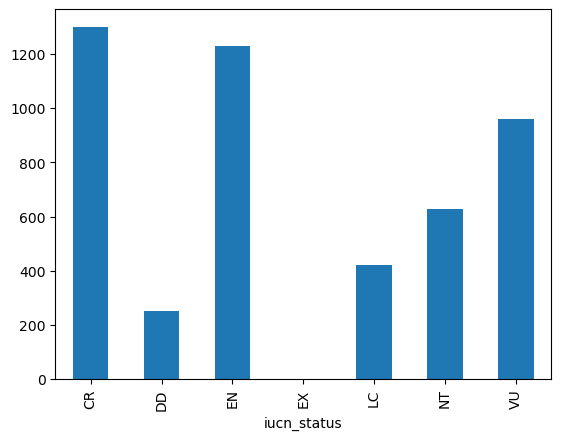

In [62]:
# what kind of plot? A bar plot.
group_avg.plot.bar()

<Axes: xlabel='iucn_status'>

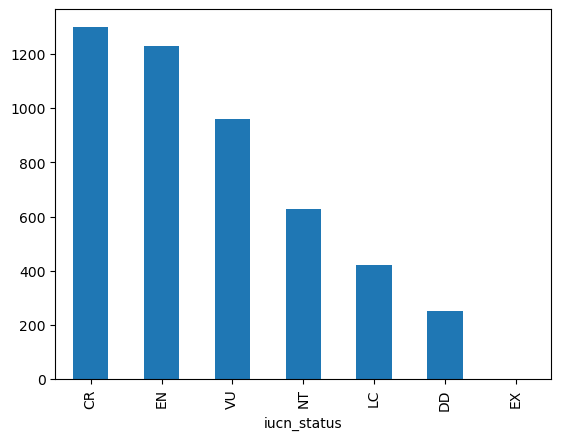

In [63]:
# hmmm..let us sort it
# group_avg.sort_values().plot.bar()
group_avg.sort_values(ascending=False).plot.bar()

Each plotting method accepts optional arguments to configure the appearance of the plot.
For example:

- `title`: the title of the plot
- `xlabel`: the label for the x-axis
- `ylabel`: the label for the y-axis

<Axes: title={'center': 'Mean Age to Maturity by IUCN Status'}, xlabel='IUCN Status', ylabel='Mean Age to Maturity (days)'>

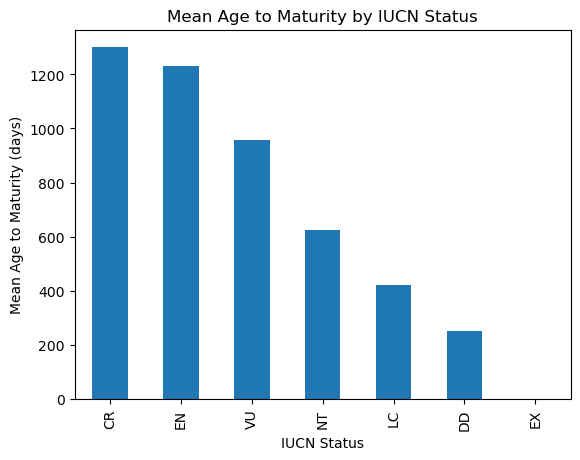

In [64]:
sorted_group_avg = group_avg.sort_values(ascending=False)
sorted_group_avg.plot.bar(
    title="Mean Age to Maturity by IUCN Status",
    xlabel="IUCN Status",
    ylabel="Mean Age to Maturity (days)"
)

By default, `Series.plot.bar` uses the `Series` *index* to label the bars.
We can customize these labels by using the `Series.rename(index=...)`.

In [65]:
old_to_new = {
    "DD": "Data Deficient",
    "EN": "Endangered",
    "CR": "Critically Endangered",
    "VU": "Vulnerable",
    "NT": "Near Threatened",
    "LC": "Least Concern",
    "EW": "Extinct in the Wild",
    "EX": "Extinct"
}

group_maturities_renamed = sorted_group_avg.rename(index=old_to_new)


In [66]:
group_maturities_renamed

iucn_status
Critically Endangered      1300.1192
Endangered               1229.000476
Vulnerable                959.020141
Near Threatened             626.7278
Least Concern              421.85625
Data Deficient                250.77
Extinct                         <NA>
Name: Maturity (days), dtype: Float64

<Axes: title={'center': 'Mean Age to Maturity by IUCN Status'}, xlabel='IUCN Status', ylabel='Mean Age to Maturity (days)'>

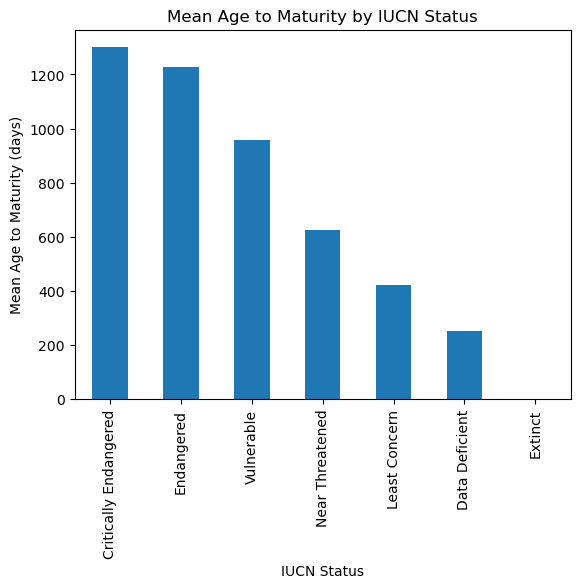

In [67]:
group_maturities_renamed.plot.bar(
    title="Mean Age to Maturity by IUCN Status",
    xlabel="IUCN Status",
    ylabel="Mean Age to Maturity (days)"
)

We can use the plotting functions with `DataFrame` objects as well! 
We need to specify the columns for the x and y axis.
For example:
- What is the relationship between maturity and litter size?

<Axes: title={'center': 'Litter Size vs. Mean Age to Maturity Among Mammals'}, xlabel='Litter Size', ylabel='Maturity (days)'>

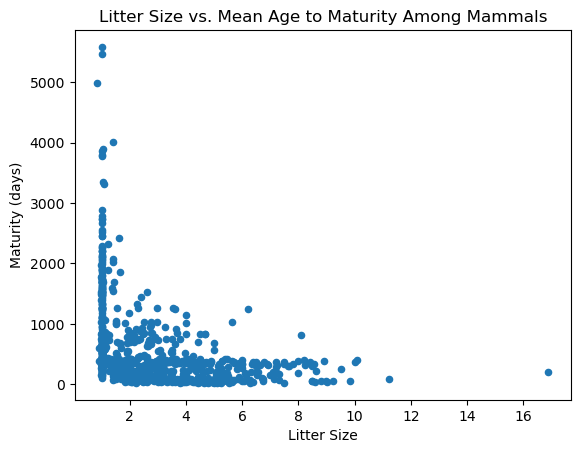

In [68]:
combined_data_clean.plot.scatter(x='Litter Size', y='Maturity (days)', 
                                 title="Litter Size vs. Mean Age to Maturity Among Mammals")
# each point on the plot is a species (datapoint)

The distribution of a numerical list of values can be visualized as a *boxplot*.

<Axes: title={'center': 'Litter Size Among Mammals'}>

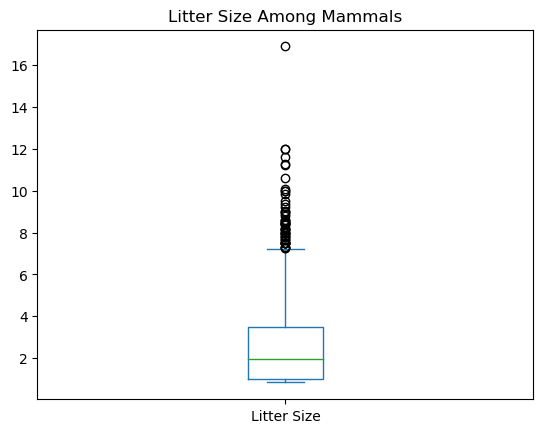

In [69]:
combined_data_clean.plot.box(
    column="Litter Size",
    title="Litter Size Among Mammals"
)